## Домашнее задание №1

Горбенко Илья

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import scipy.optimize as opt
import scipy as sp
from numpy import linalg as alg
#import sklearn
import datetime
import time
ln = np.log
import random as rd
import numpy as np
from numpy import array
from numpy import prod
import math

для экспоненциального

$$\theta = \left(\frac{k!}{\frac{\sum(X^k)}{n}}\right)^{1/k}$$

для равномерного

$$\theta = \left(\frac{\sum(X^k)}{n} (k+1)\right)^{1/k}$$

напишем функции для создания распределений и параметров, а также для нахождения среднеквадратичного

In [63]:
def create_exp(n, theta):
    return np.random.exponential(theta, n)

def theta_exp(mean, k):
    return (math.factorial(k)/mean)**(1/k) #плюс или минус 1/k ?????
    
def create_uni(n, theta):
    return theta*np.random.uniform(0,1, size=n)

def theta_uni(mean, k):
    return (mean*(k+1))**(1/k)
    

    
    
def test_k_moments(theta_1, density, theta, n, times):
    s=0
    ss=0
    for _ in range(times):
        X = density(n, theta)
        mean = np.mean(X**k)
        thetaa = theta_1(mean, k)
        s += (theta - thetaa)**2
    s = (1/times *s)**(1/2)
    return s

n- размер распределения
times- количество пересчета среднеквадратичного

Тест и построение графика для равномерного

In [93]:
x=[]
y=[]
y1 = []
for k in range(1,100):
    s=test_k_moments(theta_uni, create_uni, 1, 1000, 1000)
    x.append(k)
    y.append(s)
    s=test_k_moments(theta_uni, create_uni, 4, 1000, 1000)
    y1.append(s)

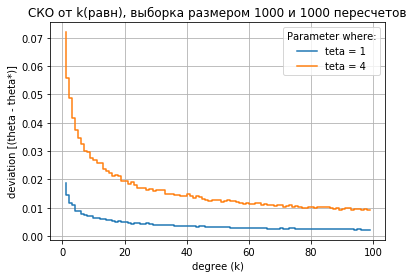

In [94]:
fig, ax = plt.subplots()

ax.step(x, y, label='teta = 1')

ax.step(x, y1, label='teta = 4')

ax.set(xlabel='degree (k)', ylabel='deviation [(theta - theta*)]',
       title='СКО от k(равн), выборка размером 1000 и 1000 пересчетов')
ax.grid()

fig.savefig("test.png")
plt.legend(title='Parameter where:')
plt.show()

In [81]:
x=[]
y=[]
y1 = []
for k in range(1,100):
    s=test_k_moments(theta_uni, create_uni, 1, 100, 100)
    x.append(k)
    y.append(s)
    s=test_k_moments(theta_uni, create_uni, 4, 100, 100)
    y1.append(s)

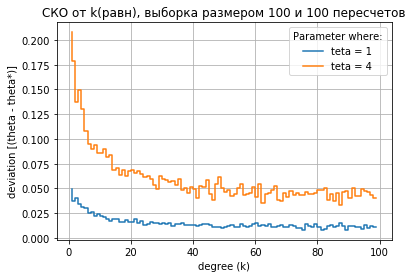

In [91]:
fig, ax = plt.subplots()

ax.step(x, y, label='teta = 1')

ax.step(x, y1, label='teta = 4')

ax.set(xlabel='degree (k)', ylabel='deviation [(theta - theta*)]',
       title='СКО от k(равн), выборка размером 100 и 100 пересчетов')
ax.grid()

fig.savefig("test.png")
plt.legend(title='Parameter where:')
plt.show()

1. при увеличении $k$ погрешность уменьшается
2. при увеличении $\theta$ погрешность увеличивается, что логично, ведь тогда увеличивается масштаб, а в данной программе считалось относительное отклонение
3. увеличение размера выборки и количества пересчетов положительно влияет на зависимость ввиду уменьшения шумов

Тест и построение графика для экспоненциального

In [88]:
a=[]
b1=[]
b2= []
b3= []
b4= []
for k in range(1,100):
    s=test_k_moments(theta_exp, create_exp, 1, 400, 400)
    a.append(k)
    b1.append(s)
    s=test_k_moments(theta_exp, create_exp, 1/2, 400, 400)
    b2.append(s)
    s=test_k_moments(theta_exp, create_exp, 1/3, 400, 400)
    b3.append(s)
    s=test_k_moments(theta_exp, create_exp, 1/4, 400, 400)
    b4.append(s)

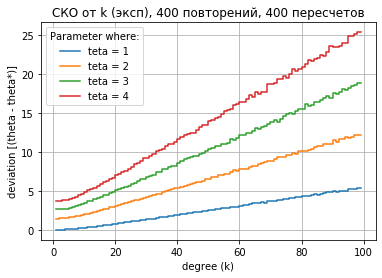

In [90]:
fig, ax = plt.subplots()

ax.step(a, b1, label='teta = 1')
ax.step(a, b2, label='teta = 2')
ax.step(a, b3, label='teta = 3')
ax.step(a, b4, label='teta = 4')

ax.set(xlabel='degree (k)', ylabel='deviation [(theta - theta*)]',
       title='СКО от k (эксп), 400 повторений, 400 пересчетов')
ax.grid()

fig.savefig("test.png")
plt.legend(title='Parameter where:')
plt.show()

Все рассуждения для этого распределения аналогичны за исключением того, что при увеличении параметра $k$ погрешность увеличивается. 